# SVM para problemas de regresión ...

$$loss = \frac{1}{n}\sum_{i = 1}^n\max(0, |y_i - (Ax_i + b)| - \varepsilon)$$

- $\varepsilon$: la mitad del margen, que fuerza a que la función *loss* sea cero para todos los puntos dentro del corredor 

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
iris = datasets.load_iris()
session = tf.Session()

In [84]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

[]

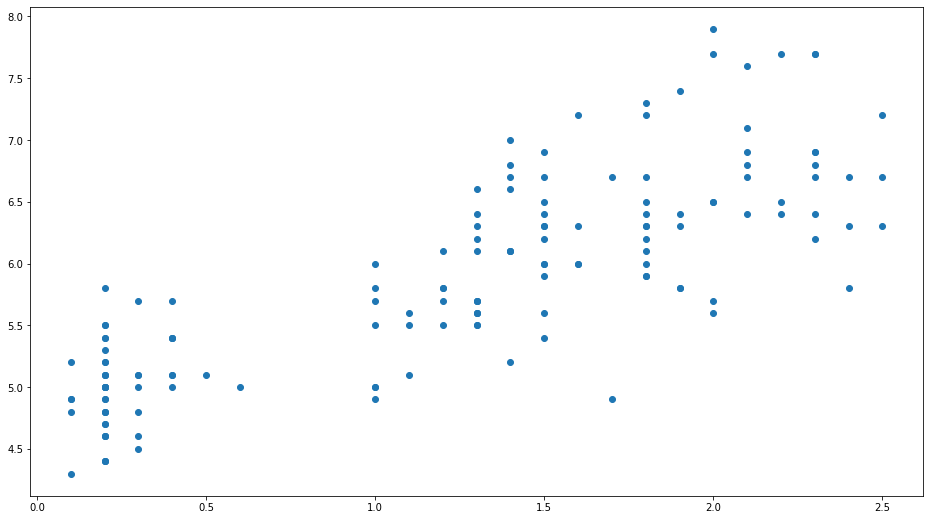

In [85]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o")
plt.plot()

In [86]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace = False)
test_idx = np.array(list(set(range(len(x_vals))) - set(train_idx)))
x_vals_train = x_vals[train_idx]
y_vals_train = y_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_test = y_vals[test_idx]

In [87]:
batch_size = 50

x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [88]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [89]:
epsilon = tf.constant([0.5])
loss = tf.reduce_mean(tf.maximum(0.0, tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))

In [90]:
my_optim = tf.train.GradientDescentOptimizer(0.005)
train_step = my_optim.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

In [91]:
train_loss = []
test_loss = []

for i in range(300):
    rand_idx = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
       
    train_loss_temp = session.run(loss, feed_dict = {x_data: np.transpose([x_vals_train]),
                                                     y_target: np.transpose([y_vals_train])})
    train_loss.append(train_loss_temp)
    
    test_loss_temp = session.run(loss, feed_dict = {x_data: np.transpose([x_vals_test]),
                                                     y_target: np.transpose([y_vals_test])})
    test_loss.append(test_loss_temp)
    
    if (i + 1) % 25 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)))
        print("Loss Train = " + str(train_loss_temp) + ", Loss Test = " + str(test_loss_temp))

Paso # 25, A = [[1.4673363]], b = [[0.23806743]]
Loss Train = 3.3128502, Loss Test = 3.4758024
Paso # 50, A = [[1.6164764]], b = [[0.36306733]]
Loss Train = 3.0086334, Loss Test = 3.1733258
Paso # 75, A = [[1.7670662]], b = [[0.4880672]]
Loss Train = 2.7026749, Loss Test = 2.869124
Paso # 100, A = [[1.917996]], b = [[0.6130671]]
Loss Train = 2.3963075, Loss Test = 2.5645175
Paso # 125, A = [[2.062486]], b = [[0.73706686]]
Loss Train = 2.1019046, Loss Test = 2.2716842
Paso # 150, A = [[2.205756]], b = [[0.85876673]]
Loss Train = 1.8216596, Loss Test = 1.9978315
Paso # 175, A = [[2.3298564]], b = [[0.9711666]]
Loss Train = 1.5942439, Loss Test = 1.7638606
Paso # 200, A = [[2.4354665]], b = [[1.0766662]]
Loss Train = 1.4164084, Loss Test = 1.5677373
Paso # 225, A = [[2.520777]], b = [[1.1713665]]
Loss Train = 1.2880166, Loss Test = 1.410588
Paso # 250, A = [[2.5827966]], b = [[1.2546664]]
Loss Train = 1.2008901, Loss Test = 1.2973502
Paso # 275, A = [[2.6254473]], b = [[1.3287662]]
Loss T

In [92]:
[[slope]] = session.run(A)
[[y_intercept]] = session.run(b)
[width] = session.run(epsilon)

best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    best_fit_upper.append(slope * i + y_intercept + width)
    best_fit_lower.append(slope * i + y_intercept - width)    

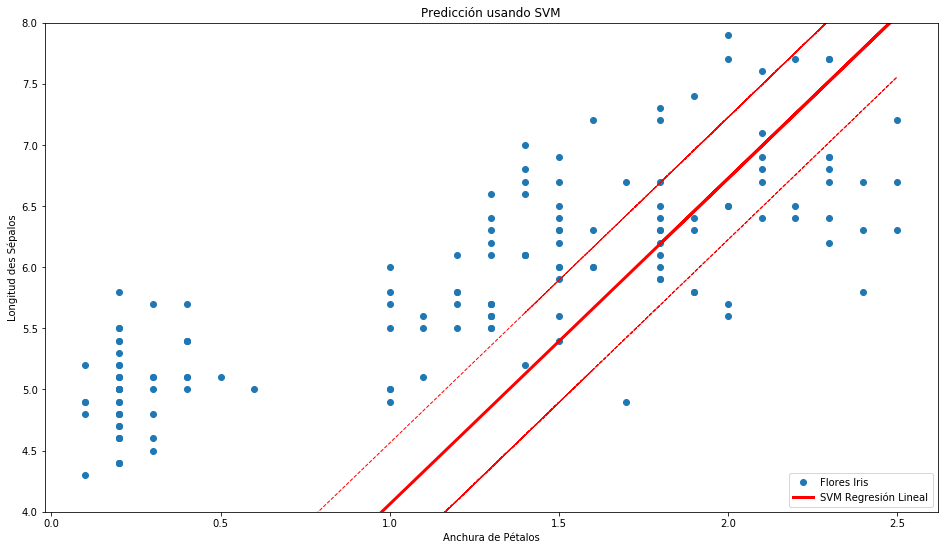

In [93]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Flores Iris")
plt.plot(x_vals, best_fit, "r", label = "SVM Regresión Lineal", linewidth = 3)
plt.plot(x_vals, best_fit_upper, "r--", linewidth = 1)
plt.plot(x_vals, best_fit_lower, "r--", linewidth = 1)
plt.ylim([4, 8])
plt.legend(loc = "lower right")
plt.xlabel("Anchura de Pétalos")
plt.ylabel("Longitud des Sépalos")
plt.title("Predicción usando SVM")
plt.show()

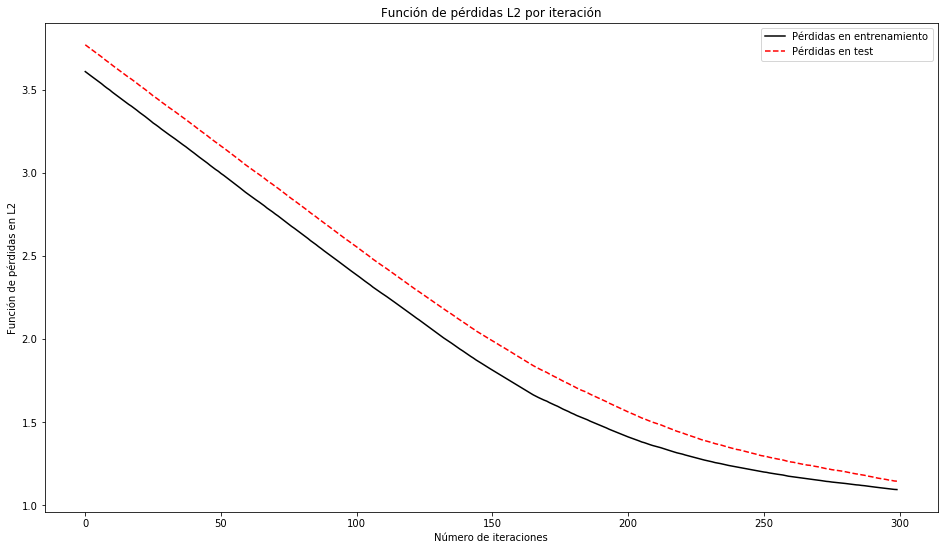

In [94]:
plt.figure(figsize = (16, 9))
plt.plot(train_loss, "k-", label = "Pérdidas en entrenamiento")
plt.plot(test_loss, "r--", label = "Pérdidas en test")
plt.title("Función de pérdidas L2 por iteración")
plt.xlabel("Número de iteraciones")
plt.ylabel("Función de pérdidas en L2")
plt.legend(loc = "upper right")
plt.show()